# Nollette Capstone 44688: Analyzing the Rise of Home Prices

# **STEP 1:**
- Activate .venv
- Install requirement.txt and update if need be
- Continue working with the datasets to create visuals and apply machine learning concepts

# **STEP 2: EDA**
- load spreadsheet into python and look over each spreadsheet seperately

# *Number of datasets*
- Print records and attributes for each dataset to give us an idea on how large this data is

In [41]:
datasets = {
    "Median Household Income": median_income_df,
    "Average Sales Price": avg_sales_df,
    "Zillow Home Value Index (ZHVI)": zhvi_long_df,
    "FHFA House Price Index (HPI)": hpi_df
}

# Print records and attributes for each dataset
for name, df in datasets.items():
    print(f"\n{name}")
    print(f"Number of records (rows): {df.shape[0]}")
    print(f"Number of attributes (columns): {df.shape[1]}")


Median Household Income
Number of records (rows): 40
Number of attributes (columns): 3

Average Sales Price
Number of records (rows): 248
Number of attributes (columns): 3

Zillow Home Value Index (ZHVI)
Number of records (rows): 15351
Number of attributes (columns): 4

FHFA House Price Index (HPI)
Number of records (rows): 194
Number of attributes (columns): 5


# *Median Household Income Data*
- This is the median household income in the US for that particular year

In [42]:
import pandas as pd
import os

# Load and preview the "MedianHouseholdIncome.xlsx" file
median_income_path = "MedianHouseIncome.xlsx"

# Try loading the file with openpyxl
median_income_df = pd.read_excel(median_income_path, engine="openpyxl")

# Show the first few rows to inspect structure
median_income_df.head(10)


,Date,Median Household Income
0,1984-01-01,22420
1,1985-01-01,23620
2,1986-01-01,24900
3,1987-01-01,26060
4,1988-01-01,27230
5,1989-01-01,28910
6,1990-01-01,29940
7,1991-01-01,30130
8,1992-01-01,30640
9,1993-01-01,31240


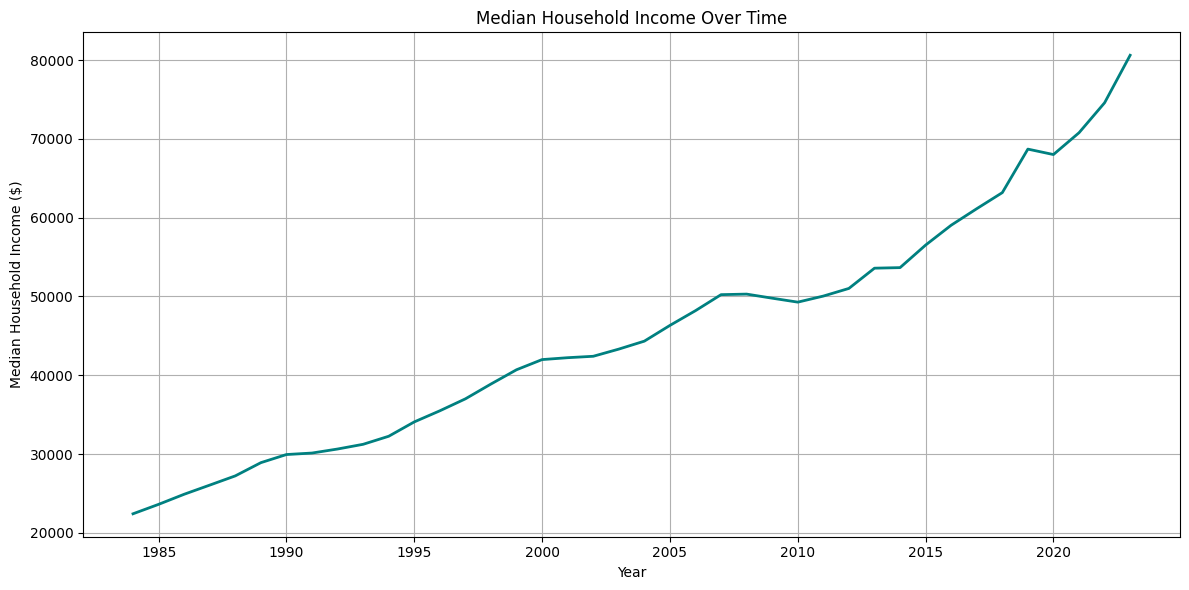

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Date column is in datetime format
median_income_df['Date'] = pd.to_datetime(median_income_df['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(median_income_df['Date'], median_income_df['Median Household Income'], color='teal', linewidth=2)

# Customize the chart
plt.title('Median Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Median Household Income ($)')
plt.grid(True)
plt.tight_layout()



plt.show()

# *Average Sales Price Data*
- This data looks at what the average sales price of homes in the US were for that particular year

In [44]:
import pandas as pd
import os

# File path for the new Average Sales Price dataset
avg_sales_price_path = "AverageSalesPrice.xlsx"

# Load and preview the dataset
avg_sales_df = pd.read_excel(avg_sales_price_path, engine="openpyxl")
avg_sales_df.head(10)

,Date,Average Sales Price
0,1963-01-01,19300
1,1963-04-01,19400
2,1963-07-01,19200
3,1963-10-01,19600
4,1964-01-01,19600
5,1964-04-01,20200
6,1964-07-01,20500
7,1964-10-01,20900
8,1965-01-01,21500
9,1965-04-01,21000


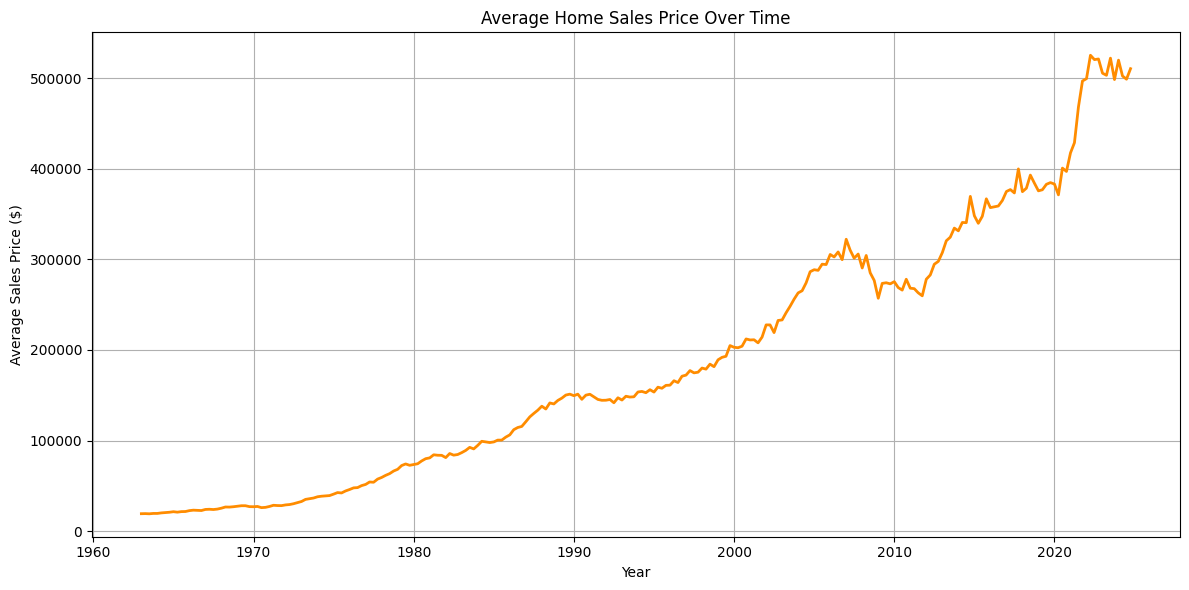

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the Date column is in datetime format
avg_sales_df['Date'] = pd.to_datetime(avg_sales_df['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_sales_df['Date'], avg_sales_df['Average Sales Price'], color='darkorange', linewidth=2)

# Customize the chart
plt.title('Average Home Sales Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sales Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## *Zillow Home Value Index*

In [46]:
import pandas as pd

# Load the cleaned Zillow Home Value Index spreadsheet
zhvi_path = "ZillowHomeValueIndex.xlsx"
zhvi_df = pd.read_excel(zhvi_path, engine="openpyxl")

# Reshape the ZHVI data to long format using melt
zhvi_long_df = pd.melt(
    zhvi_df,
    id_vars=["Date"],         # Keep the Date column as-is
    var_name="State",         # New column for former column headers (state names)
    value_name="ZHVI"         # New column for the actual ZHVI values
)

# Preview the reshaped dataset
zhvi_long_df.head(400)

,Date,State,ZHVI
0,2000-01-01,Virginia,121500.816357
1,2000-02-01,Virginia,121815.215773
2,2000-03-01,Virginia,122148.552957
3,2000-04-01,Virginia,122778.449372
4,2000-05-01,Virginia,123386.545365
...,...,...,...
395,2007-11-01,California,438698.175013
396,2007-12-01,California,432828.628047
397,2008-01-01,California,426983.909090
398,2008-02-01,California,420085.325085


## Time Series Data on all 50 states

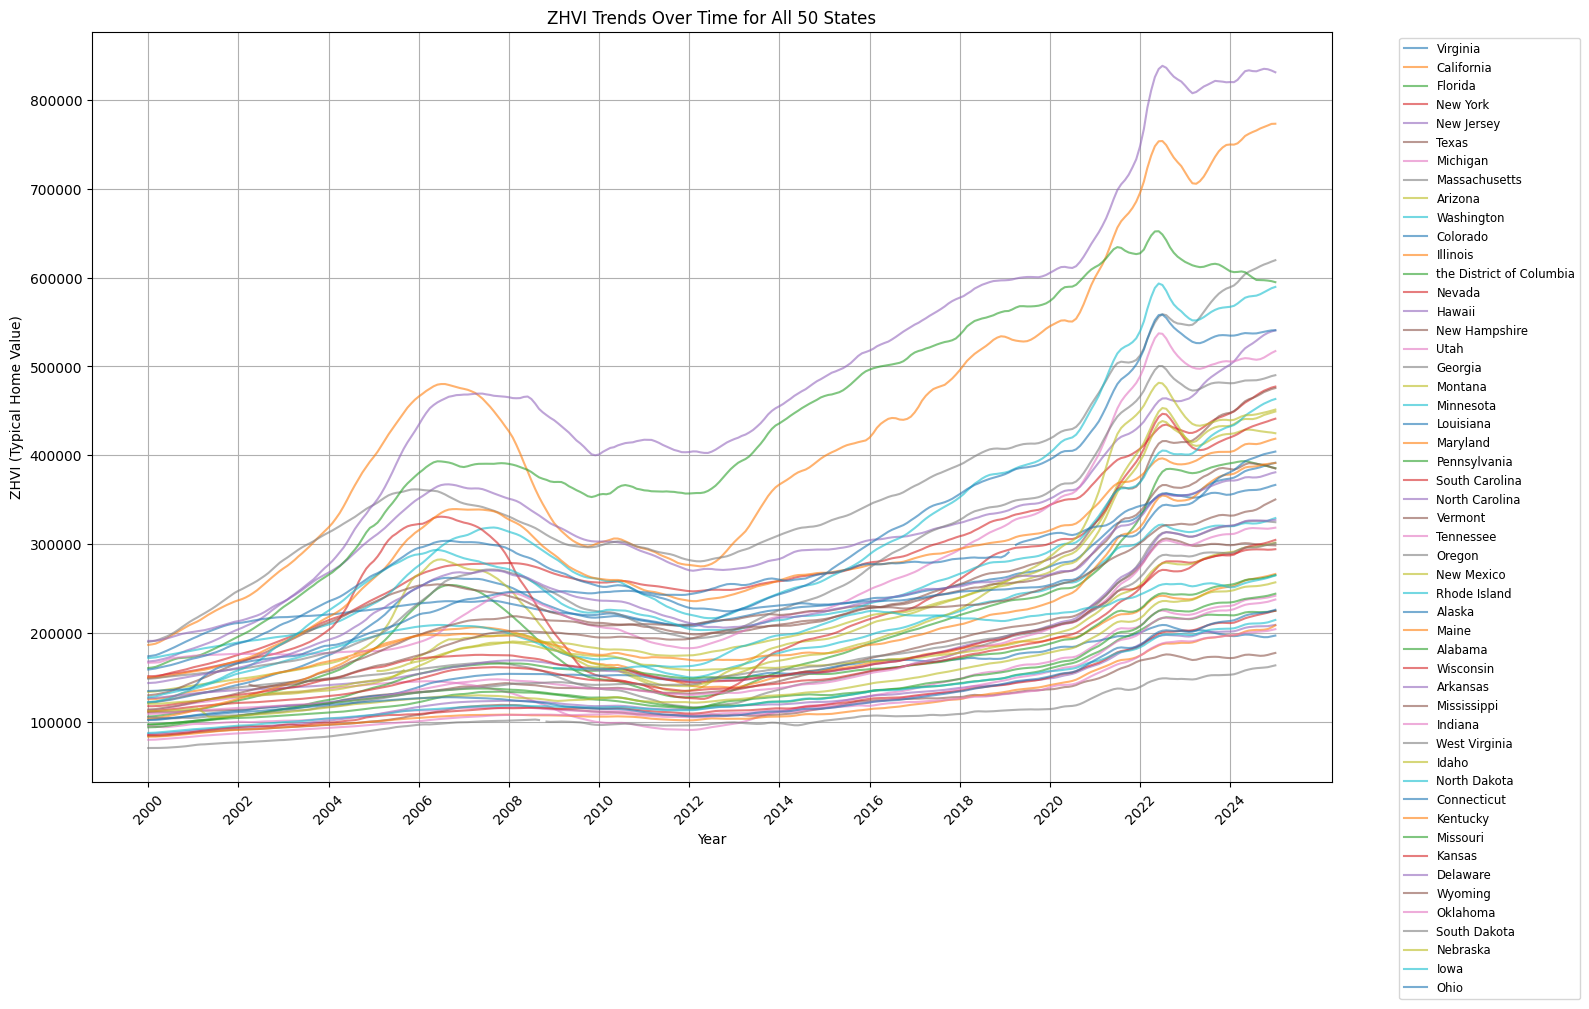

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date column is datetime
zhvi_long_df['Date'] = pd.to_datetime(zhvi_long_df['Date'])

# Generate x-ticks every 2 years
tick_years = pd.date_range(start=zhvi_long_df['Date'].min(), 
                           end=zhvi_long_df['Date'].max(), 
                           freq='2YS')

# Plot all 50 states
plt.figure(figsize=(16, 10))

# Loop through each state
for state in zhvi_long_df['State'].unique():
    state_df = zhvi_long_df[zhvi_long_df['State'] == state]
    plt.plot(state_df['Date'], state_df['ZHVI'], label=state, alpha=0.6)

# Set x-ticks every 2 years
plt.xticks(ticks=tick_years, labels=[d.year for d in tick_years], rotation=45)

# Chart labels and formatting
plt.title('ZHVI Trends Over Time for All 50 States')
plt.xlabel('Year')
plt.ylabel('ZHVI (Typical Home Value)')
plt.grid(True)

# Optional: Show legend (comment out if too cluttered)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)

plt.tight_layout()
plt.show()

## *FHFA House Pricing Index*

In [48]:
import pandas as pd
import os

# File path for the FHFA HPI
fhfa_hpi_path = "fhfaHousePriceIndex.xlsx"

# Load and preview the dataset
hpi_df = pd.read_excel(fhfa_hpi_path, engine="openpyxl")
hpi_df.head(10)

,Place,Year,Quarter,HPI
0,USA,1975,1,35.91
1,USA,1975,2,36.17
2,USA,1975,3,37.12
3,USA,1975,4,37.92
4,USA,1976,1,38.03
5,USA,1976,2,39.44
6,USA,1976,3,40.45
7,USA,1976,4,40.99
8,USA,1977,1,41.76
9,USA,1977,2,43.99


/var/folders/79/86s93xxs3ws_x29618bbhg9c0000gn/T/ipykernel_781/738070516.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hpi_df['Date'] = pd.to_datetime(hpi_df['Year'].astype(str) + 'Q' + hpi_df['Quarter'].astype(str))


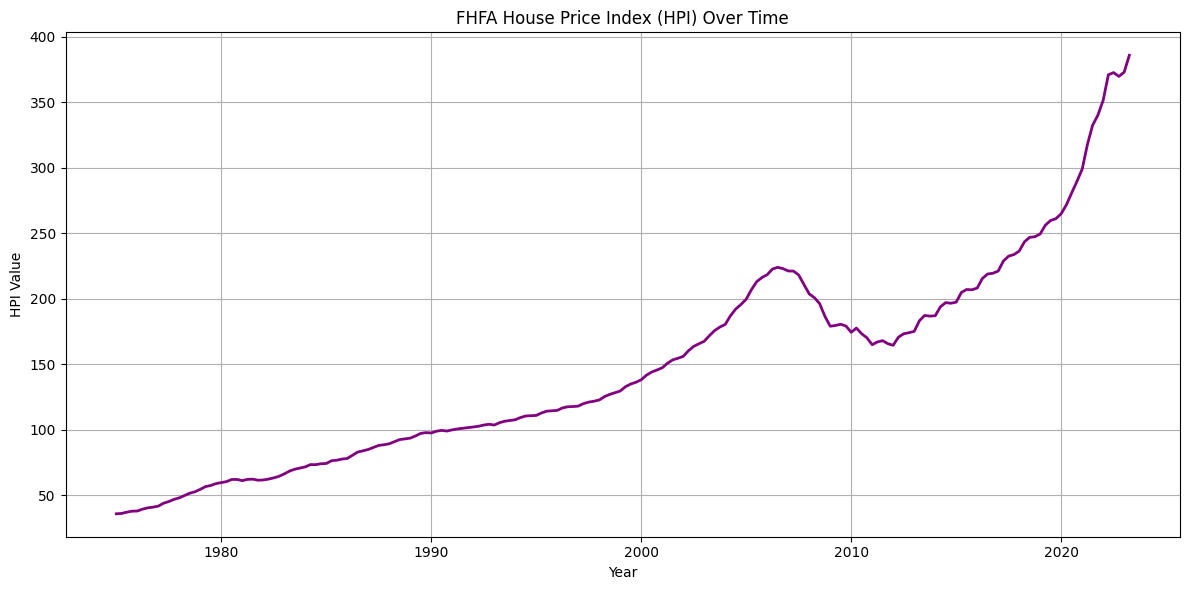

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert Year and Quarter into a single datetime column
hpi_df['Date'] = pd.to_datetime(hpi_df['Year'].astype(str) + 'Q' + hpi_df['Quarter'].astype(str))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(hpi_df['Date'], hpi_df['HPI'], color='purple', linewidth=2)

# Customize the chart
plt.title('FHFA House Price Index (HPI) Over Time')
plt.xlabel('Year')
plt.ylabel('HPI Value')
plt.grid(True)
plt.tight_layout()

# Save the FHFA as a PNG file
plt.savefig("charts/fhfa_hpi.png", dpi=300, bbox_inches='tight')

plt.show()

# **STEP 3: ANALYZING THE TRENDS**

## *Average sales price vs Median household income:*

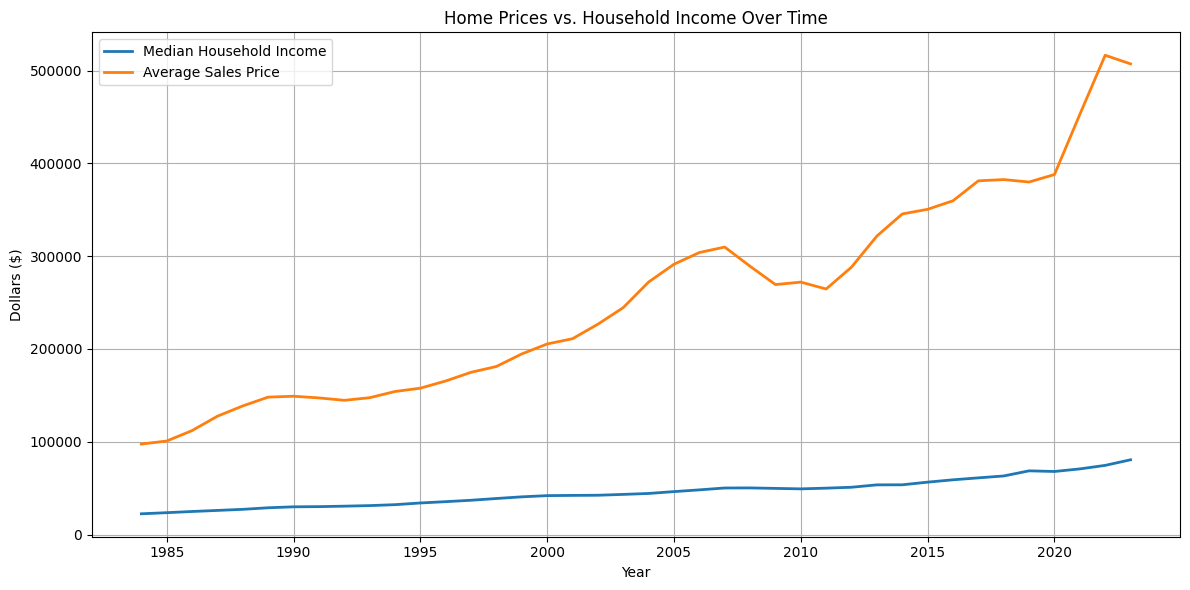

In [50]:
import matplotlib.pyplot as plt

# Step 1: Extract Year from Date
median_income_df['Year'] = median_income_df['Date'].dt.year
avg_sales_df['Year'] = avg_sales_df['Date'].dt.year

# Step 2: Group both datasets by year
income_by_year = median_income_df.groupby('Year')['Median Household Income'].mean()
sales_price_by_year = avg_sales_df.groupby('Year')['Average Sales Price'].mean()

# Step 3: Combine into a single DataFrame
comparison_df = pd.DataFrame({
    'Median Household Income': income_by_year,
    'Average Sales Price': sales_price_by_year
}).dropna()

# Step 4: Plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Median Household Income'], label='Median Household Income', linewidth=2)
plt.plot(comparison_df.index, comparison_df['Average Sales Price'], label='Average Sales Price', linewidth=2)

# Formatting
plt.title('Home Prices vs. Household Income Over Time')
plt.xlabel('Year')
plt.ylabel('Dollars ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# ✅ Save the figure before showing it
plt.savefig("charts/medianincome_homeprices.png", dpi=300, bbox_inches='tight')
plt.show()

## *Price to Income Ratio:*
- It shows how many years of income it would take to buy a home (without debt or expenses). A rising ratio = decreasing affordability
- Ratio = Average Home Price / Median Household Income

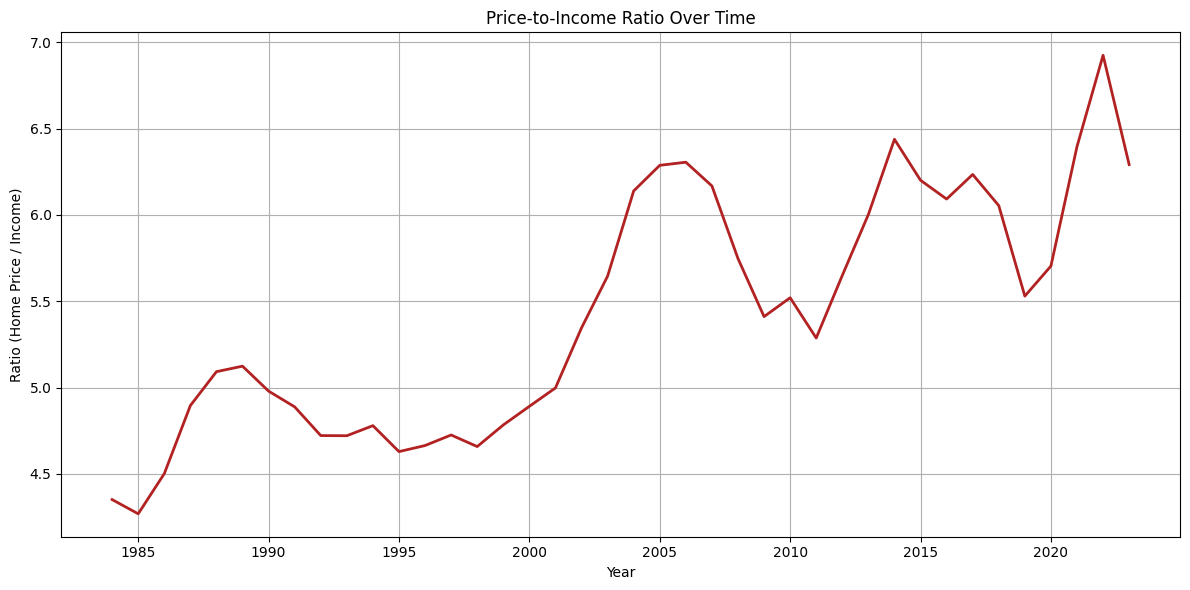

In [51]:
# Step 1: Use the same comparison_df from earlier (already grouped by year)
# Ensure no missing values
comparison_df = comparison_df.dropna()

# Step 2: Create a new column for the ratio
comparison_df['Price-to-Income Ratio'] = comparison_df['Average Sales Price'] / comparison_df['Median Household Income']

# Step 3: Plot the ratio
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['Price-to-Income Ratio'], color='firebrick', linewidth=2)

# Chart styling
plt.title('Price-to-Income Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Ratio (Home Price / Income)')
plt.grid(True)
plt.tight_layout()
plt.show()

## *Group ZHVI by Year and State*

In [52]:
# Add Year column
zhvi_long_df['Year'] = zhvi_long_df['Date'].dt.year

# Group by Year and State
zhvi_grouped = zhvi_long_df.groupby(['Year', 'State'])['ZHVI'].mean().reset_index()
print(zhvi_grouped.head())


   Year       State           ZHVI
0  2000     Alabama   98480.480782
1  2000      Alaska  135621.437855
2  2000     Arizona  136531.711707
3  2000    Arkansas   87559.076318
4  2000  California  196170.728385


## *ZHVI Heatmap By State and Year*

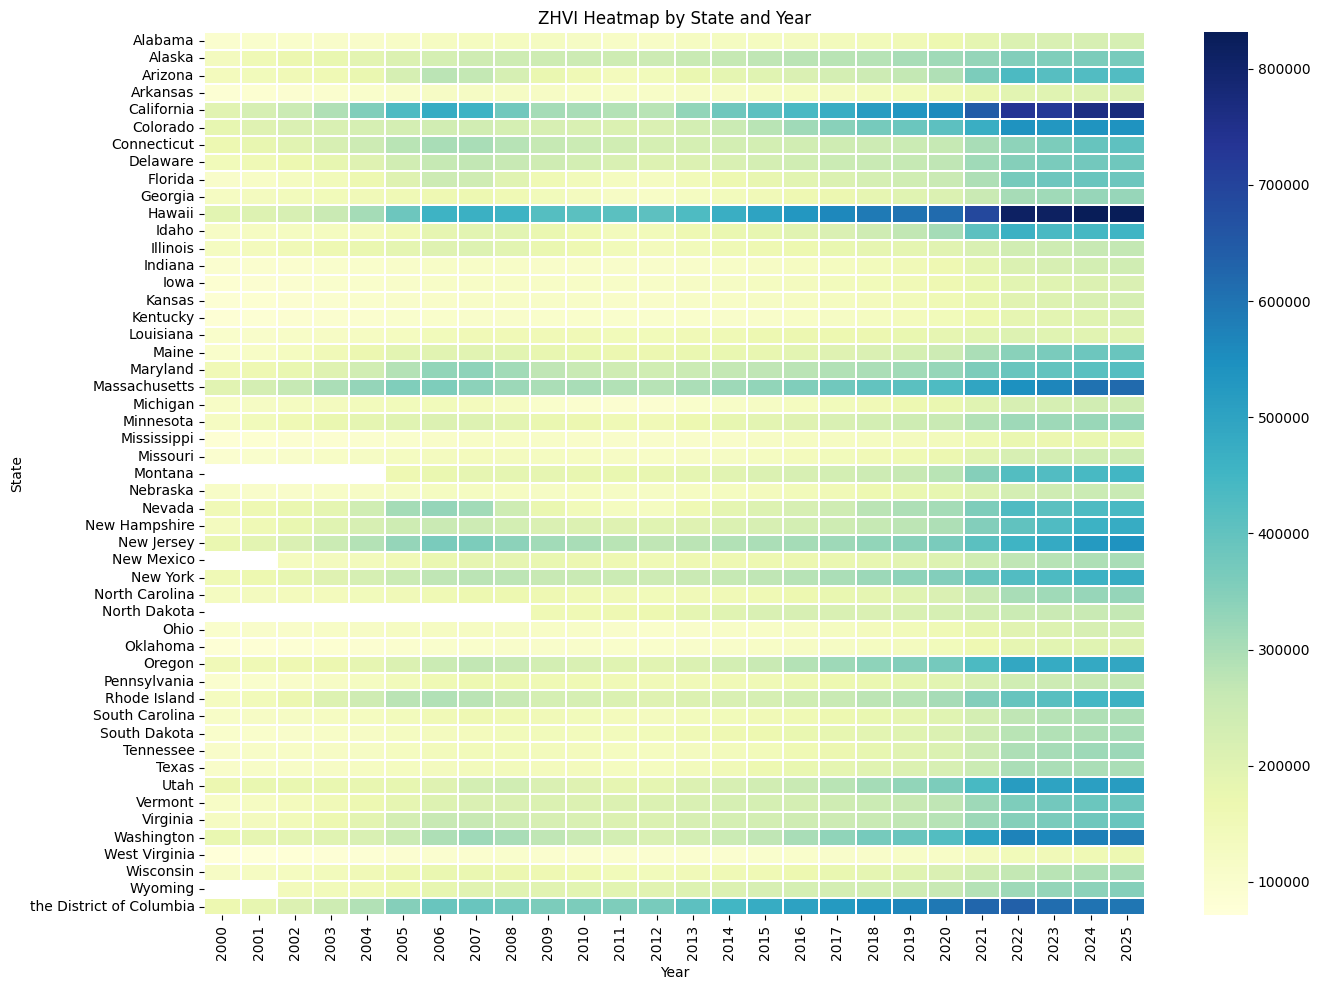

In [53]:
import seaborn as sns

# Pivot the table so states are rows and years are columns
zhvi_pivot = zhvi_grouped.pivot(index='State', columns='Year', values='ZHVI')

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(zhvi_pivot, cmap='YlGnBu', linewidths=0.3)
plt.title('ZHVI Heatmap by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()

# Save the heatmap as a PNG file
plt.savefig("charts/zhvi_heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

## *Home Prices vs Income Bar Chart*

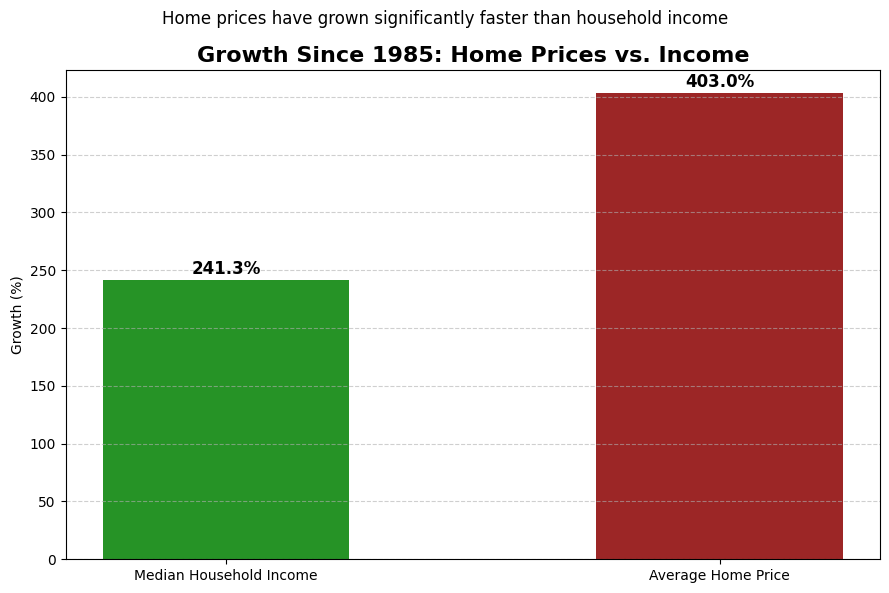

In [54]:
import matplotlib.pyplot as plt

# Set baseline year
base_year = 1985

# Make sure the base year exists in both series
if base_year in comparison_df.index:
    # Get baseline and final values
    start_income = comparison_df.loc[base_year, 'Median Household Income']
    end_income = comparison_df.iloc[-1]['Median Household Income']
    start_price = comparison_df.loc[base_year, 'Average Sales Price']
    end_price = comparison_df.iloc[-1]['Average Sales Price']

    # Calculate growth percentages
    income_growth = (end_income - start_income) / start_income * 100
    price_growth = (end_price - start_price) / start_price * 100

    # Plotting
    plt.figure(figsize=(9, 6))
    bars = plt.bar(
        ['Median Household Income', 'Average Home Price'],
        [income_growth, price_growth],
        color=['green', 'darkred'],
        alpha = 0.85,
        width=0.5
    )

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.1f}%', 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

    # Titles and labels
    plt.title(f'Growth Since {base_year}: Home Prices vs. Income', fontsize=16, fontweight='bold')
    plt.suptitle('Home prices have grown significantly faster than household income', fontsize=12)
    plt.ylabel('Growth (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.ylim(0, max(income_growth, price_growth) + 20)
    plt.tight_layout()

    # Save the Bar Chart as a PNG file
    plt.savefig("charts/barchart.png", dpi=300, bbox_inches='tight')

    plt.show()

else:
    print(f"Data for base year {base_year} is not available in the dataset.")


## *Median Household Income vs Avg Sales Price vs Ratio*
- We'll plot income and home prices on the left y-axis, and overlay the price-to-income ratio on the right y-axis using a secondary axis

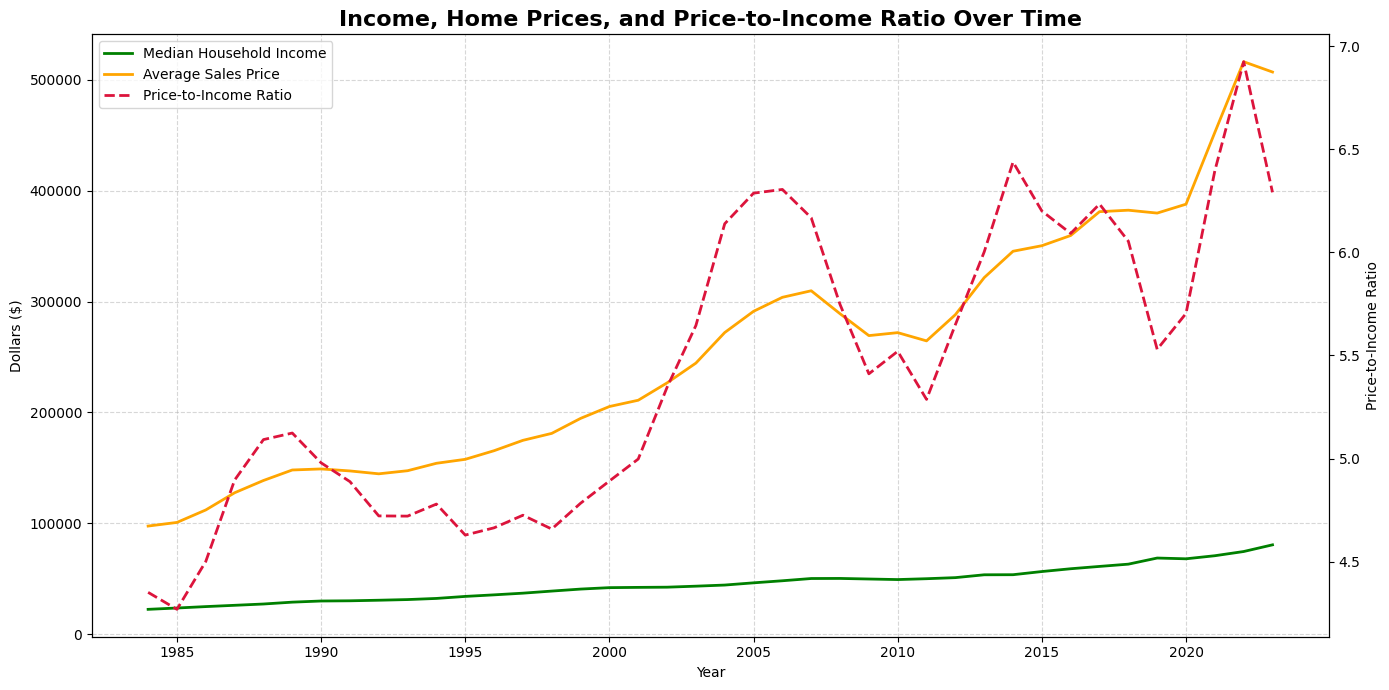

In [55]:
import matplotlib.pyplot as plt

# Ensure the comparison_df has the correct index
comparison_df = comparison_df.copy()

# Calculate the price-to-income ratio
comparison_df['Price-to-Income Ratio'] = comparison_df['Average Sales Price'] / comparison_df['Median Household Income']

# Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Left Y-axis: Income and Home Prices
ax1.plot(comparison_df.index, comparison_df['Median Household Income'], label='Median Household Income', color='green', linewidth=2)
ax1.plot(comparison_df.index, comparison_df['Average Sales Price'], label='Average Sales Price', color='orange', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Dollars ($)')
ax1.tick_params(axis='y')

# Add a grid
ax1.grid(True, linestyle='--', alpha=0.5)

# Right Y-axis: Price-to-Income Ratio
ax2 = ax1.twinx()
ax2.plot(comparison_df.index, comparison_df['Price-to-Income Ratio'], label='Price-to-Income Ratio', color='crimson', linewidth=2, linestyle='--')
ax2.set_ylabel('Price-to-Income Ratio')
ax2.tick_params(axis='y')

# Title and legends
plt.title('Income, Home Prices, and Price-to-Income Ratio Over Time', fontsize=16, fontweight='bold')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')
plt.tight_layout()

# Save the PIR comparative as a PNG file
plt.savefig("charts/PIR_comparative.png", dpi=300, bbox_inches='tight')

plt.show()

# **STEP 4: MACHINE LEARNING**

- I am now implementing simple machine learning algorithms to help predict future home prices and household income

### Train/Split Test
- First step is to train our models. We're going to run some sample tests (Train/Split Test) to ensure accurate results on our future polynomial regression models

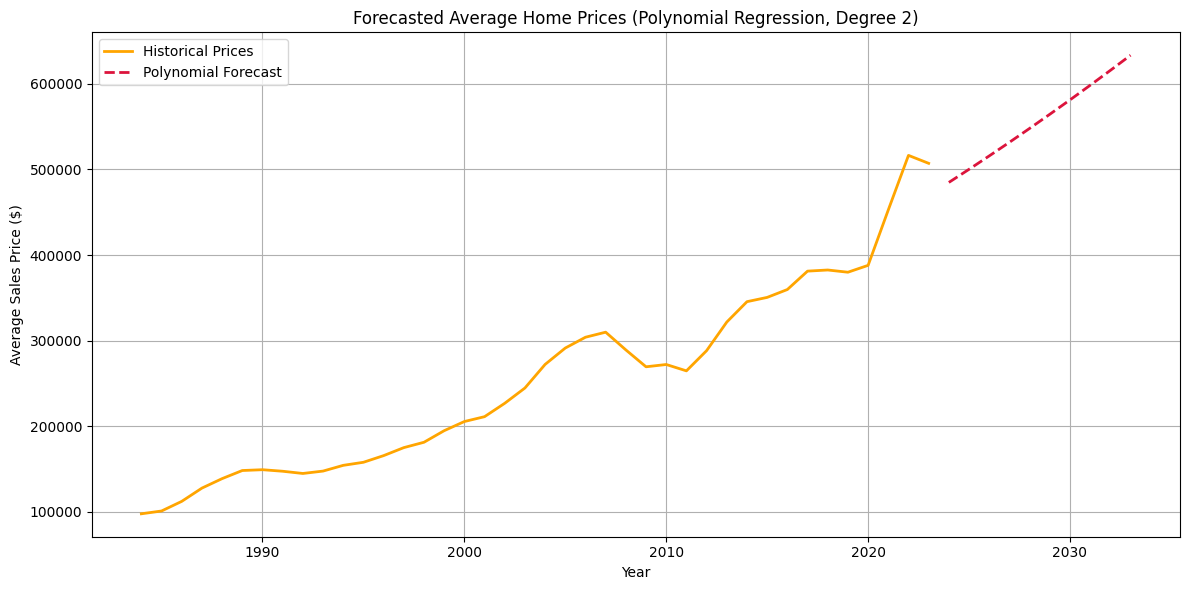

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Set degree of the polynomial (2 = quadratic, 3 = cubic)
degree = 2

# Prepare the data
comparison_df = comparison_df.dropna()
X_years = comparison_df.index.values.reshape(-1, 1)
y_prices = comparison_df['Average Sales Price'].values

# Transform features to polynomial
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_years)

# Train the model
model_poly = LinearRegression()
model_poly.fit(X_poly, y_prices)

# Predict future years (next 10 years)
future_years = np.arange(comparison_df.index.max() + 1, comparison_df.index.max() + 11).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
price_preds_poly = model_poly.predict(future_years_poly)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(X_years, y_prices, label='Historical Prices', linewidth=2, color='orange')
plt.plot(future_years, price_preds_poly, label='Polynomial Forecast', linestyle='--', linewidth=2, color='crimson')

plt.title(f'Forecasted Average Home Prices (Polynomial Regression, Degree {degree})')
plt.xlabel('Year')
plt.ylabel('Average Sales Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save the Forecasted Average Home Price as a PNG file
plt.savefig("charts/Price_Forecast.png", dpi=300, bbox_inches='tight')

plt.show()

In [57]:
# Running a MAE (Mean absolute Error) and an R2 test to check for accuracy

# Define a cut-off year for testing
cutoff_year = 2011

# Split the data
X_train = X_years[X_years.flatten() <= cutoff_year]
y_train = y_prices[X_years.flatten() <= cutoff_year]

X_test = X_years[X_years.flatten() > cutoff_year]
y_test = y_prices[X_years.flatten() > cutoff_year]

# Transform features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model
model_poly.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model_poly.predict(X_test_poly)

# Evaluate
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error: $28,751.33
R² Score: 0.548


##### Visualize our predicted results vs. actual to see how the trends are holding up

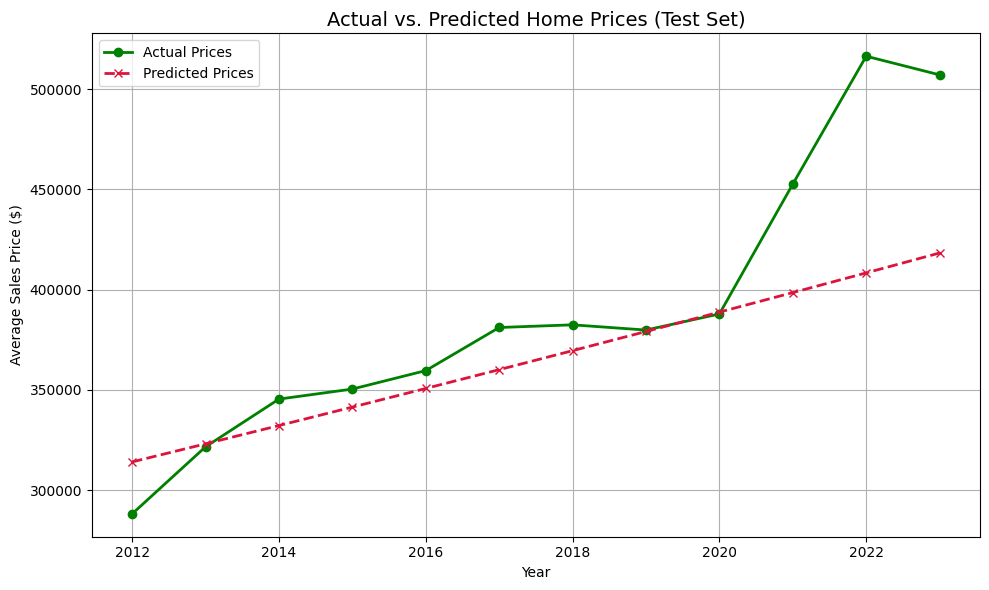

In [58]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, label='Actual Prices', marker='o', linewidth=2, color='green')
plt.plot(X_test, y_pred, label='Predicted Prices', marker='x', linestyle='--', linewidth=2, color='crimson')

# Chart styling
plt.title('Actual vs. Predicted Home Prices (Test Set)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Sales Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
price_preds_poly = model_poly.predict(future_years_poly)

## Polynomial Regression for Household Income!!

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare data (already done earlier)
X_years_income = comparison_df.index.values.reshape(-1, 1)
y_income = comparison_df['Median Household Income'].values

# Train/test split
cutoff_year = 2011
X_train_income = X_years_income[X_years_income.flatten() <= cutoff_year]
y_train_income = y_income[X_years_income.flatten() <= cutoff_year]
X_test_income = X_years_income[X_years_income.flatten() > cutoff_year]
y_test_income = y_income[X_years_income.flatten() > cutoff_year]

# Train linear regression model
model_income_linear = LinearRegression()
model_income_linear.fit(X_train_income, y_train_income)

# Predict and evaluate
y_pred_income = model_income_linear.predict(X_test_income)
mae_income = mean_absolute_error(y_test_income, y_pred_income)
r2_income = r2_score(y_test_income, y_pred_income)

print(f"Mean Absolute Error (Income - Linear): ${mae_income:,.2f}")
print(f"R² Score (Income - Linear): {r2_income:.3f}")

Mean Absolute Error (Income - Linear): $4,784.34
R² Score (Income - Linear): 0.481


### Actual vs. Predicted

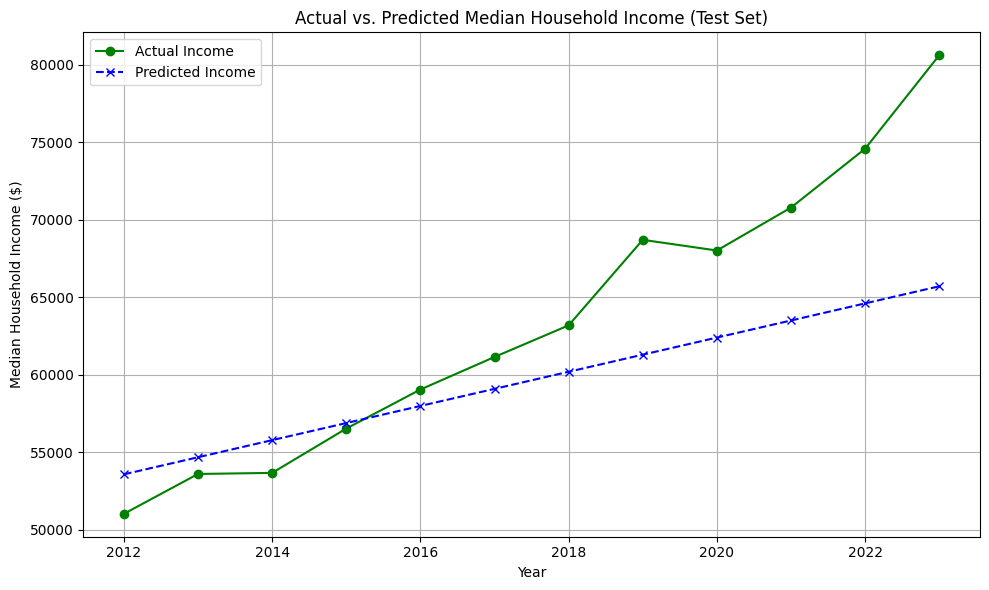

In [61]:
# Visualize actual vs. predicted income values
plt.figure(figsize=(10, 6))
plt.plot(X_test_income, y_test_income, label='Actual Income', marker='o', color='green')
plt.plot(X_test_income, y_pred_income, label='Predicted Income', linestyle='--', marker='x', color='blue')

plt.title('Actual vs. Predicted Median Household Income (Test Set)')
plt.xlabel('Year')
plt.ylabel('Median Household Income ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
# Forecast for future years (2024–2033)
future_income_preds_linear = model_income_linear.predict(future_years)

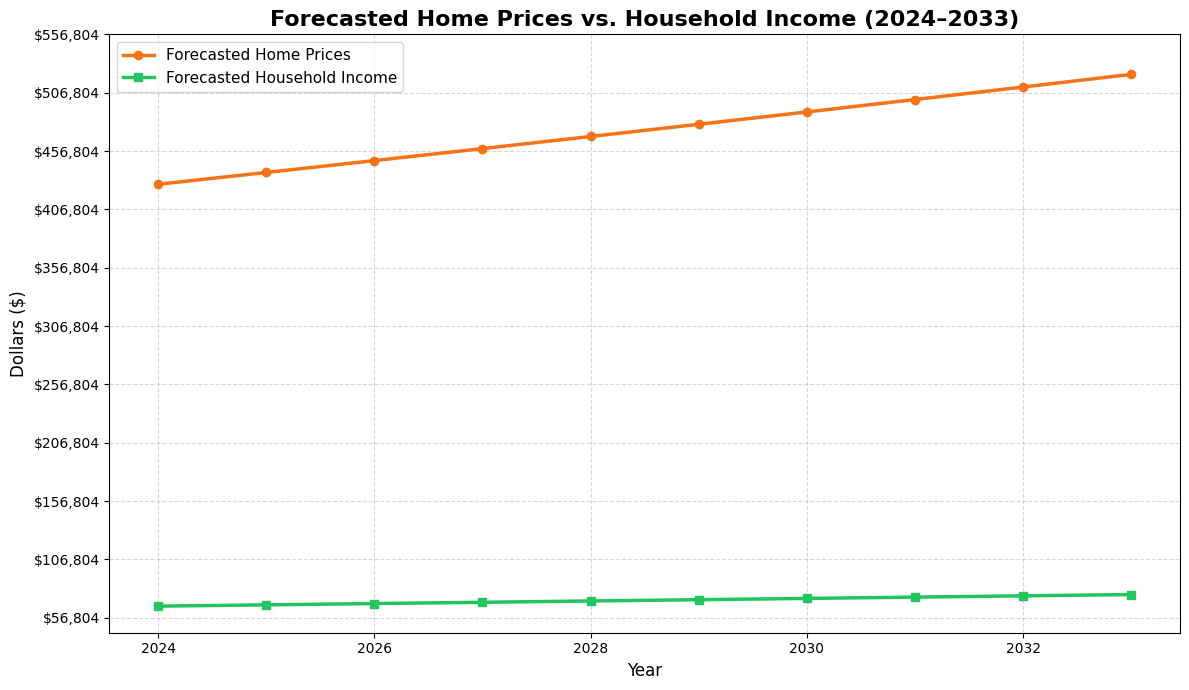

<Figure size 640x480 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

# Set up figure
plt.figure(figsize=(12, 7))

# Plot forecasted home prices
plt.plot(future_years, price_preds_poly, label='Forecasted Home Prices', color='#F97316', linewidth=2.5, marker='o')

# Plot forecasted income
plt.plot(future_years, future_income_preds_linear, label='Forecasted Household Income', color='#22C55E', linewidth=2.5, marker='s')

# Titles and labels
plt.title('Forecasted Home Prices vs. Household Income (2024–2033)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Dollars ($)', fontsize=12)

# Set y-axis ticks at $50,000 intervals
min_val = min(future_income_preds_linear.min(), price_preds_poly.min())
max_val = max(future_income_preds_linear.max(), price_preds_poly.max())
y_ticks = np.arange(int(min_val) - 10000, int(max_val) + 50000, 50000)
plt.yticks(y_ticks)

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Grid + Legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=11, loc='upper left')

plt.tight_layout()
plt.show()

# Save the Forecasted Prices vs Income as a PNG file
plt.savefig("charts/IncomePrices_forecasted.png", dpi=300, bbox_inches='tight')

## Price to Income Ratio
- A rising PIR means homes are becoming less affordable relative to income.

In [64]:
# Calculate Price-to-Income Ratio (2024–2033)
future_affordability_ratio = price_preds_poly / future_income_preds_linear

In [65]:
# Calculate average forecasted PIR
average_pir = future_affordability_ratio.mean()
print(f"Average Price-to-Income Ratio (2024–2033): {average_pir:.2f}")

Average Price-to-Income Ratio (2024–2033): 6.61


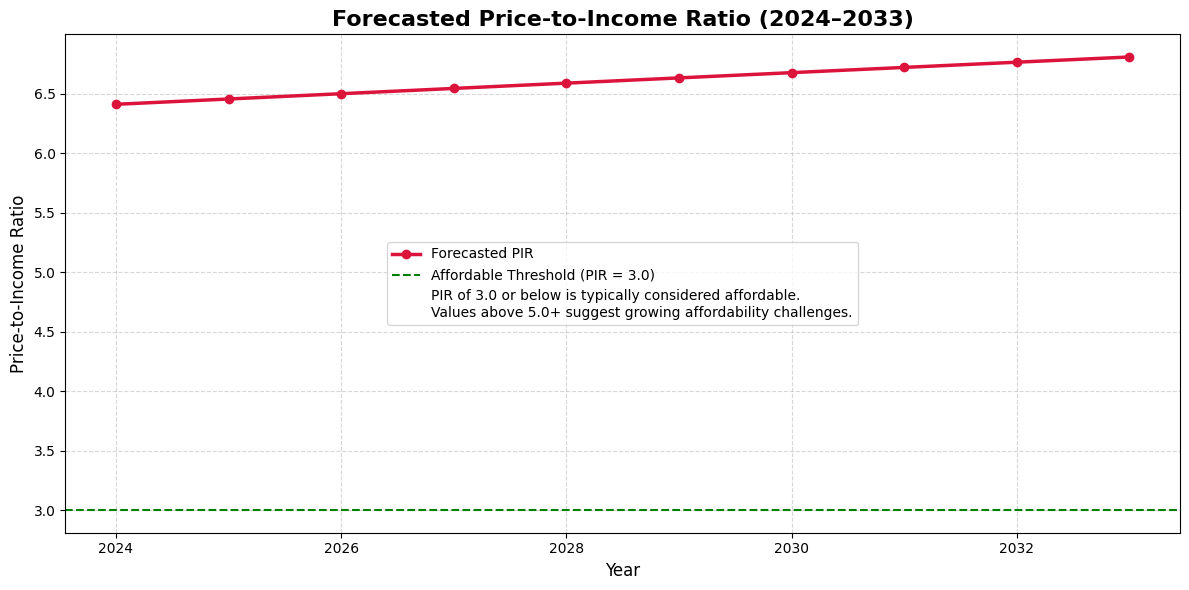

<Figure size 640x480 with 0 Axes>

In [69]:
#Plot PIR Forecast

import matplotlib.pyplot as plt

# Plot PIR forecast
plt.figure(figsize=(12, 6))
plt.plot(future_years, future_affordability_ratio, color='crimson', linewidth=2.5, marker='o', label='Forecasted PIR')

# Add horizontal line for benchmark (optional)
plt.axhline(y=3.0, color='green', linestyle='--', linewidth=1.5, label='Affordable Threshold (PIR = 3.0)')

# Add custom legend note
legend_note = "PIR of 3.0 or below is typically considered affordable.\nValues above 5.0+ suggest growing affordability challenges."
plt.plot([], [], ' ', label=legend_note)  # Empty plot for legend text

# Formatting
plt.title('Forecasted Price-to-Income Ratio (2024–2033)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price-to-Income Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=10)
plt.tight_layout()  # Adjust layout to fit legend
plt.show()

# Save the Forecasted PIR vs Income as a PNG file
plt.savefig("charts/PIR_forecasted.png", dpi=300, bbox_inches='tight')


## FHFA HPI Forecast
- Adding more value to show that the future of home prices will be unaffordable

In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

# Split data before and after cutoff year (e.g., 2015)
cutoff_year = 2011
X_train = X_hpi[X_hpi.flatten() <= cutoff_year]
y_train = y_hpi[X_hpi.flatten() <= cutoff_year]
X_test = X_hpi[X_hpi.flatten() > cutoff_year]
y_test = y_hpi[X_hpi.flatten() > cutoff_year]

# Train and predict
model_hpi.fit(X_train, y_train)
y_pred = model_hpi.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

MAE: 39.86
R² Score: 0.310


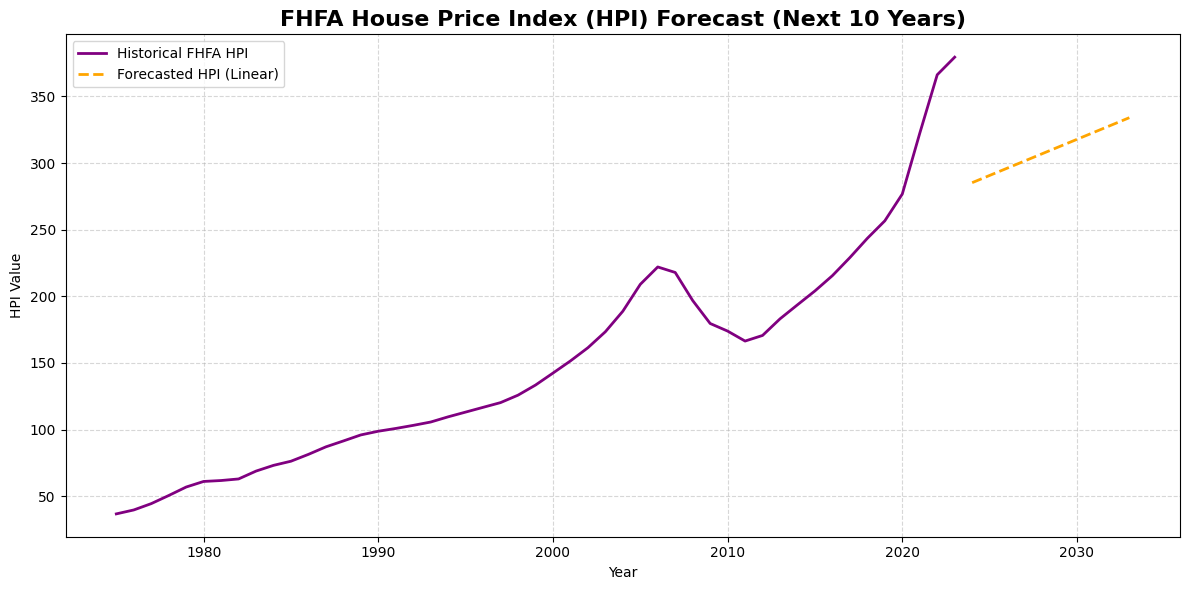

In [73]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Extract year from date for modeling
hpi_df['Year'] = hpi_df['Date'].dt.year

# Group by year to get the average HPI per year
hpi_by_year = hpi_df.groupby('Year')['HPI'].mean().reset_index()

# Prepare training data
X_hpi = hpi_by_year['Year'].values.reshape(-1, 1)
y_hpi = hpi_by_year['HPI'].values

# Train linear regression model
model_hpi = LinearRegression()
model_hpi.fit(X_hpi, y_hpi)

# Forecast next 10 years
last_year = hpi_by_year['Year'].max()
future_years_hpi = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)
hpi_forecast = model_hpi.predict(future_years_hpi)

# Plot actual and forecasted HPI
plt.figure(figsize=(12, 6))
plt.plot(hpi_by_year['Year'], y_hpi, label='Historical FHFA HPI', linewidth=2, color='purple')
plt.plot(future_years_hpi, hpi_forecast, label='Forecasted HPI (Linear)', linestyle='--', linewidth=2, color='orange')

# Format chart
plt.title('FHFA House Price Index (HPI) Forecast (Next 10 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('HPI Value')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Zillow Home Value Index
- We are using this information to simply support the main idea... Home prices are outpacing median houshold income and leading to unaffordabiilty of the house market

In [76]:
#Step 1: Aggregate National ZHVI by Year

# Create a 'Year' column
zhvi_long_df['Year'] = zhvi_long_df['Date'].dt.year

# Group by year to get average ZHVI across all states
zhvi_by_year = zhvi_long_df.groupby('Year')['ZHVI'].mean().reset_index()

In [77]:
#Step 2: Linear Regression + Forecast

from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X_zhvi = zhvi_by_year['Year'].values.reshape(-1, 1)
y_zhvi = zhvi_by_year['ZHVI'].values

# Train model
model_zhvi = LinearRegression()
model_zhvi.fit(X_zhvi, y_zhvi)

# Forecast next 10 years
last_year = zhvi_by_year['Year'].max()
future_years_zhvi = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)
zhvi_forecast = model_zhvi.predict(future_years_zhvi)

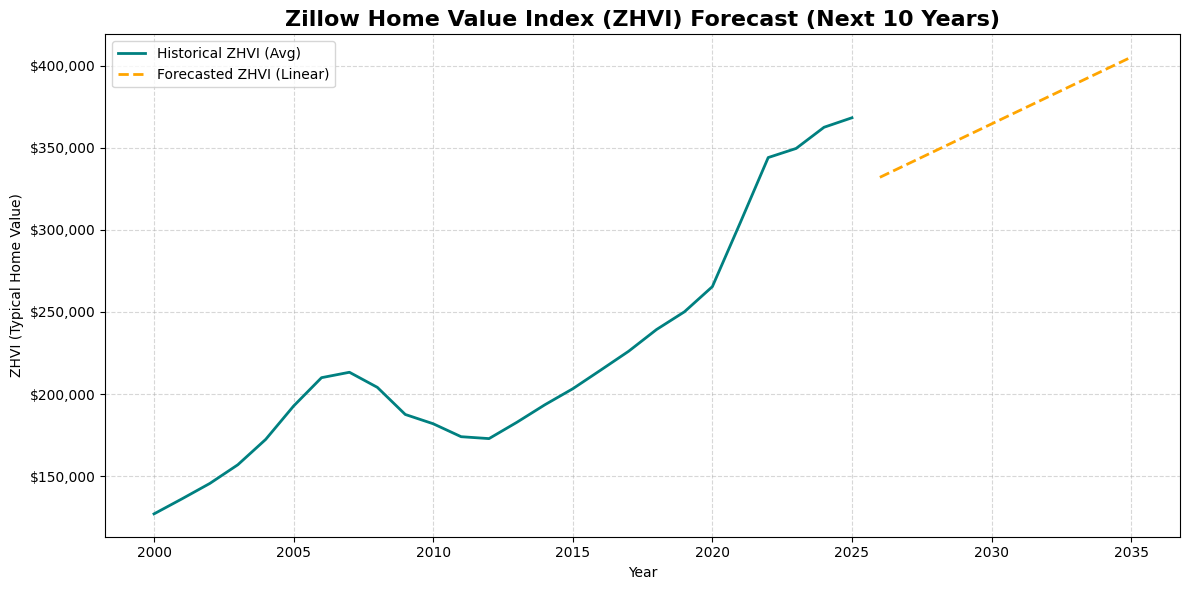

<Figure size 640x480 with 0 Axes>

In [78]:
#Step 3: Plot Results

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))
plt.plot(zhvi_by_year['Year'], y_zhvi, label='Historical ZHVI (Avg)', linewidth=2, color='teal')
plt.plot(future_years_zhvi, zhvi_forecast, label='Forecasted ZHVI (Linear)', linestyle='--', linewidth=2, color='orange')

plt.title('Zillow Home Value Index (ZHVI) Forecast (Next 10 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('ZHVI (Typical Home Value)')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Save the Forecasted ZHVI as a PNG file
plt.savefig("charts/ZHVI_forecasted.png", dpi=300, bbox_inches='tight')